<a href="https://colab.research.google.com/github/rabiyulfahimhasim786/opencv-basics/blob/main/Tabledetection_and_extract_as_a_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Loading original image to display

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


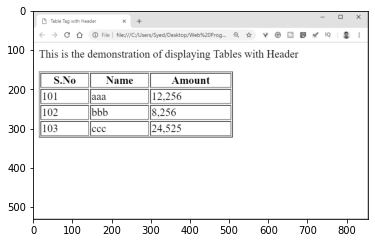

In [2]:
import cv2
import matplotlib.pyplot as plt
file=r'img.png'
img = cv2.imread(file,0)
plot1 = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Inverted Image with global thresh holding

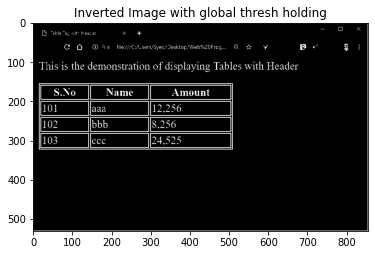

In [3]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

Inverted Image with otsu thresh holding

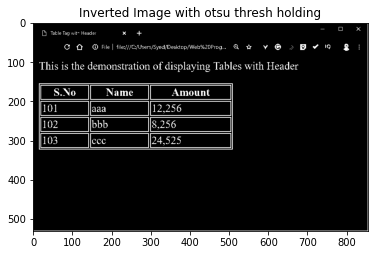

In [4]:
img_bin1 = 255-img
thresh1,img_bin1_otsu = cv2.threshold(img_bin1,128,255,cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin1_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

Inverted image with both global and Otsu thresholding

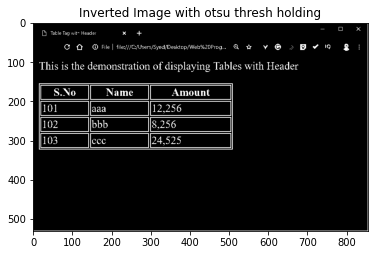

In [5]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()


Create a rectangular structuring element

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
print(kernel)

[[1 1]
 [1 1]]


Morphological Operations

Create a new structuring element to perform erosion on the image

First we need to get the vertical lines.

We create a vertical kernel with kernel width 1 and height the number of columns in image array divided by 200.

Erosion makes the pixel 1 only if all the pixels under kernel are 1.

We perform erosion for 5 iterations with the vertical kernel.


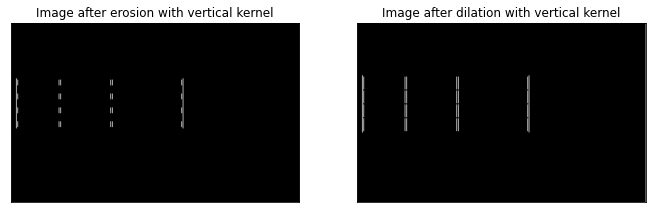

In [7]:
import numpy as np
plt.figure(figsize= (30,30))

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//100))
eroded_image = cv2.erode(img_bin_otsu, vertical_kernel, iterations=3)
plt.subplot(151),plt.imshow(eroded_image, cmap = 'gray')
plt.title('Image after erosion with vertical kernel'), plt.xticks([]), plt.yticks([])

vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=3)
plt.subplot(152),plt.imshow(vertical_lines, cmap = 'gray')
plt.title('Image after dilation with vertical kernel'), plt.xticks([]), plt.yticks([])

plt.show()



Dilation will make the pixel 1, if at least one of the pixels under the kernel is 1.

Similarly lets do the same with a horizontal lines to get the horizontal lines.


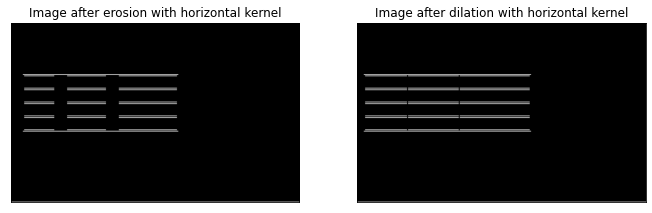

In [8]:
plt.figure(figsize= (30,30))

hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (np.array(img).shape[1]//100, 1))
horizontal_lines = cv2.erode(img_bin, hor_kernel, iterations=5)
plt.subplot(153),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after erosion with horizontal kernel'), plt.xticks([]), plt.yticks([])

horizontal_lines = cv2.dilate(horizontal_lines, hor_kernel, iterations=5)
plt.subplot(154),plt.imshow(horizontal_lines, cmap = 'gray')
plt.title('Image after dilation with horizontal kernel'), plt.xticks([]), plt.yticks([])

plt.show()

Now we add the two images

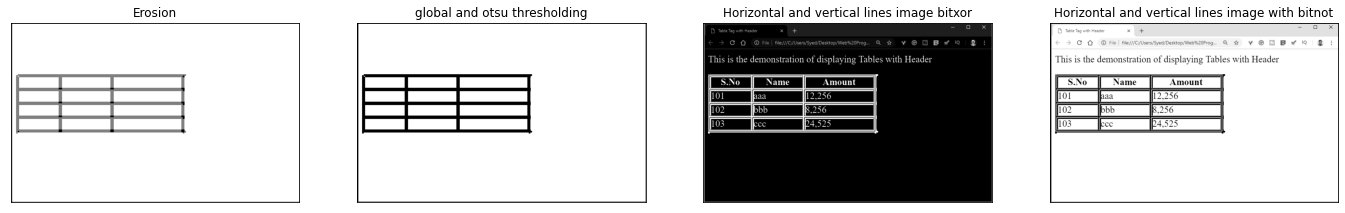

In [9]:
plt.figure(figsize= (30,30))

vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)
plt.subplot(151),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('Erosion'), plt.xticks([]), plt.yticks([])

thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.subplot(152),plt.imshow(vertical_horizontal_lines, cmap = 'gray')
plt.title('global and otsu thresholding'), plt.xticks([]), plt.yticks([])

bitxor = cv2.bitwise_xor(img,vertical_horizontal_lines)
plt.subplot(153),plt.imshow(bitxor, cmap = 'gray')
plt.title('Horizontal and vertical lines image bitxor'), plt.xticks([]), plt.yticks([])

bitnot = cv2.bitwise_not(bitxor)
plt.subplot(154),plt.imshow(bitnot, cmap = 'gray')
plt.title('Horizontal and vertical lines image with bitnot'), plt.xticks([]), plt.yticks([])

plt.show()

In [12]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 3.9 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [13]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 42 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,829 kB/s)
debconf: unable to initi

In [10]:
import pytesseract

Let's get the contours from the grid that we have obtained by adding the horizontal and vertical lines.

In [11]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

Bounding Boxes

To get the coordinates of different boxes

In [12]:
boundingBoxes = [cv2.boundingRect(contour) for contour in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda x:x[1][1]))

Here we draw the contours on our image and also store them in list boxes. It is stored as a list (x,y,w,h) : x and y beind coordinates of top left corner and w and h being width and height of the box respectively.


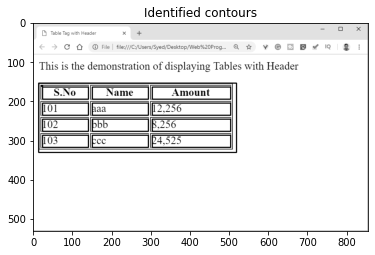

In [13]:
boxes = []
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if (w<1000 and h<500):
    image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

Getting the rows and columns

To store rows and columns :

    Now we add rows and columns.
    We calculate the mean height of all boxes.
    Initially, we append the first box to the columns list.
    The columns list is essentialy a temporary list.
    We assign previous box to the first box as well.
    We will loop through the remaining boundingBoxes list.
    At each iteration, we check if the y coordinate of the top left corner of the current box is less than the y coordinate of the previous box added with half the mean of all heights.
    If yes :
        The current box is appended to columns list.
        The current box is assigned to previous box.
        Next we check if we are at the last index. If yes :
            We append the entire column to rows list.
    If no :
        We append the columns list to rows.
        We assign the columns list to empty as this will start a new empty columns list.
        We assign the current box to the previous box variable.
        We append the current box to the empty column list we just created.




In [14]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
  if(boxes[i][1]<=previous[1]+mean/2):
    columns.append(boxes[i])
    previous=boxes[i]
    if(i==len(boxes)-1):
      rows.append(columns)
  else:
    rows.append(columns)
    columns=[]
    previous = boxes[i]
    columns.append(boxes[i])
print("Rows")
for row in rows:
  print(row)

71.8
Rows
[[14, 153, 505, 177], [20, 159, 4, 2], [304, 163, 200, 31], [151, 163, 143, 31], [24, 163, 117, 31]]
[[304, 204, 200, 31], [151, 204, 143, 31], [24, 204, 117, 31]]
[[304, 245, 200, 31], [151, 245, 143, 31], [24, 245, 117, 31]]
[[304, 286, 200, 31], [151, 286, 143, 31], [24, 286, 117, 31]]


Lets get the total cells in each row

In [15]:
total_cells=0
for i in range(len(row)):
  if len(row[i]) > total_cells:
    total_cells = len(row[i])
print(total_cells)

4


Lets get the centre of cell

*   We add the width of cell to left bottom x coordinate to the the x coordinate of centre of cell.




In [16]:
center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
print(center)

[404, 222, 82]


In [17]:
center=np.array(center)
center.sort()
print(center)

[ 82 222 404]


Now we create a list of the coordinates of the boxes

In [18]:
boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
for box in boxes_list:
  print(box)

[[[14, 153, 505, 177], [20, 159, 4, 2], [24, 163, 117, 31]], [[151, 163, 143, 31]], [[304, 163, 200, 31]], []]
[[[24, 204, 117, 31]], [[151, 204, 143, 31]], [[304, 204, 200, 31]], []]
[[[24, 245, 117, 31]], [[151, 245, 143, 31]], [[304, 245, 200, 31]], []]
[[[24, 286, 117, 31]], [[151, 286, 143, 31]], [[304, 286, 200, 31]], []]


In [36]:
!pip install -U pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Extract image from the boxes and get the contents using pytesseract

*    We extract the region of interest from the image.
*    For the cell we resize it, then perform morphological operations on the extracted cell area to remove noise.
*    Finally, we use pytesseract to convert the image to a string.
*    We append the strings in each row first to temporary string s with spaces, and then we append this temporary string to the final dataframe.


In [19]:
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
        if(len(boxes_list[i][j])==0):
            dataframe_final.append(' ')
        else:
            for k in range(len(boxes_list[i][j])):
                y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
                roi = bitnot[x:x+h, y:y+w]
                kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                dilation = cv2.dilate(resizing, kernel,iterations=1)
                erosion = cv2.erode(dilation, kernel,iterations=2)                
                out = pytesseract.image_to_string(erosion)
                if(len(out)==0):
                    out = pytesseract.image_to_string(erosion)
                s = s +" "+ out
            dataframe_final.append(s)
print(dataframe_final)

[' —\n=\n~\nSo\n5\na\n\n \n\x0c \x0c S.No\n\x0c', ' Name\n\x0c', ' Amount\n\x0c', ' ', ' 101\n\x0c', ' aaa\n\x0c', ' 12,256\n\x0c', ' ', ' 102\n\x0c', ' bbb\n\x0c', ' 8,256\n\x0c', ' ', ' 103\n\x0c', ' ccc\n\x0c', ' 24,525\n\x0c', ' ']


Next we create a Numpy array from the dataframe

In [20]:
arr = np.array(dataframe_final)
arr

array([' —\n=\n~\nSo\n5\na\n\n \n\x0c \x0c S.No\n\x0c', ' Name\n\x0c',
       ' Amount\n\x0c', ' ', ' 101\n\x0c', ' aaa\n\x0c', ' 12,256\n\x0c',
       ' ', ' 102\n\x0c', ' bbb\n\x0c', ' 8,256\n\x0c', ' ', ' 103\n\x0c',
       ' ccc\n\x0c', ' 24,525\n\x0c', ' '], dtype='<U27')

Creating a dataframe from extracted data

*    We reshape our array into a dataframe with the number of rows and columns.
*    Lets print out the columns and check!


In [21]:
import pandas as pd
dataframe = pd.DataFrame(arr.reshape(len(rows), total_cells))
data = dataframe.style.set_properties(align="left")
#print(data)
#print(dataframe)
d=[]
for i in range(0,len(rows)):
  for j in range(0,total_cells):
    print(dataframe[i][j],end=" ")
  print()

 —
=
~
So
5
a

 
  S.No
  101
  102
  103
 
 Name
  aaa
  bbb
  ccc
 
 Amount
  12,256
  8,256
  24,525
 
        


Printing Dataframe

In [22]:
print(dataframe)

                                      0         1           2  3
0   —\n=\n~\nSo\n5\na\n\n \n  S.No\n   Name\n   Amount\n   
1                                101\n    aaa\n   12,256\n   
2                                102\n    bbb\n    8,256\n   
3                                103\n    ccc\n   24,525\n   



Final task is to save this data into a csv format for further uses.

*    A output.csv file is generated in google colab. You can download it.


In [25]:
dataframe.to_csv("output.csv")